In [1]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings''' 

    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content 
file=r'D:\Downloads\WhatsApp Chat with DAIs.txt'
chat = read_file(file) 

In [2]:
clean_chat = [line for line in chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat)) 

length of clean_chat is:
2266


In [3]:
import re

In [4]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs) 


2149

In [5]:
texts=msgs

In [6]:
def countnonoverlappingrematches(pattern, thestring):
  return re.subn(pattern, '', thestring)[1]

for i in range(len(msgs)):
    x=countnonoverlappingrematches('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})(, [0-9][0-9]?:[0-9][0-9] [A-z][A-z] -)',msgs[i])
    if(x!=1):
        print(i)

In [7]:
msgs=texts

In [8]:
len(msgs)

2149

In [9]:
countnonoverlappingrematches('(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})(, [0-9][0-9]?:[0-9][0-9] [A-z][A-z] -)',msgs[0])

1

In [10]:
msgs[7865:7875]

[]

In [11]:
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing
print("length of time is:")
print(len(time))

length of time is:
2149


In [12]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
date
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)


2149

In [13]:
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name) 

2149

In [14]:
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)



2149

In [15]:
import pandas as pd
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
len(df)

2149

In [16]:
len(df)

2149

In [17]:
df = df[df["Content"]!='Missing Text']
len(df)
df.reset_index(inplace=True, drop=True)


In [31]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [19]:
df['weekday'] = df['DateTime'].apply(lambda x: x.day_name()) 

In [20]:
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))


In [21]:
df['Hour'] = df['DateTime'].apply(lambda x : x.hour) 
# The first token of a value in the Time Column contains the hour (Eg., "12" in "12:15")

In [22]:
chat_name=file.split('\\')[-1].split('.')[0]
chat_name
df.to_csv(chat_name+".csv")

In [23]:
text=" ".join(content)

In [24]:
import string
exclude = set(string.punctuation)
s = ''.join(ch for ch in text if ch not in exclude)

In [25]:
new_text=s.replace('Media omitted','')
new_text=new_text.replace('thi','')
new_text=new_text.replace('Thi','')
words_text=re.sub(r'\b\w{1,2}\b', '', new_text)
words_text=re.sub(r'Missing Text','',words_text)

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS) 

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words_text) 


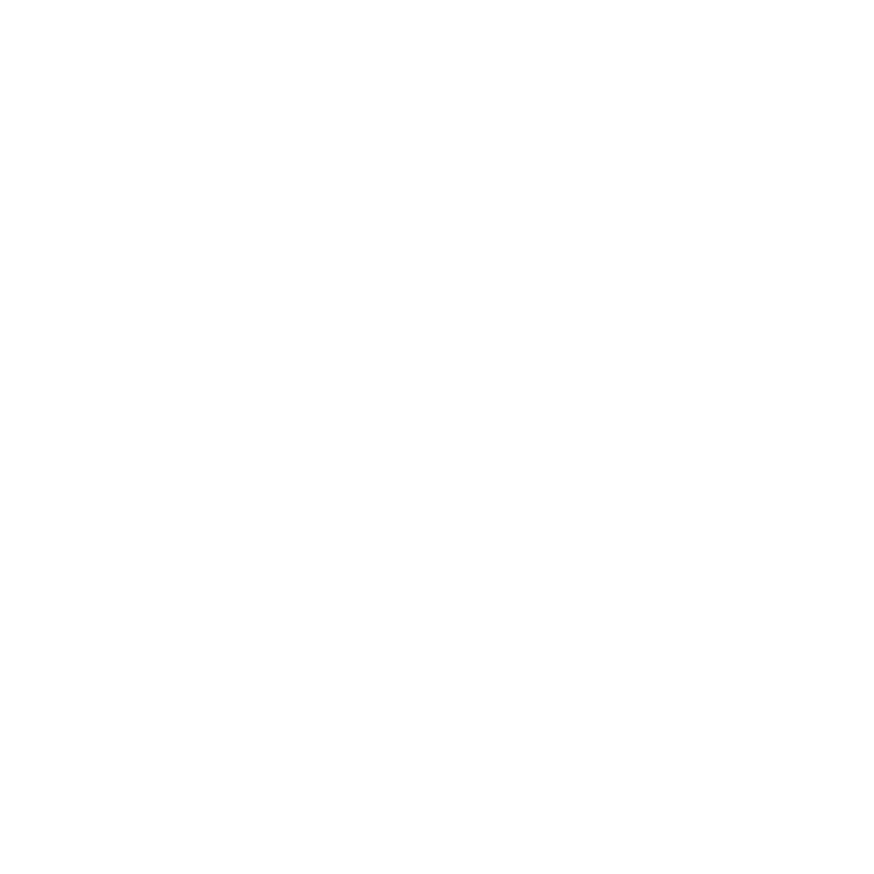

In [33]:
plt.figure(figsize = (15, 15), facecolor = "none") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 11) 